In [1]:
from os import path
from spindle_tracker.io.trackmate import trackmate_peak_import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re

In [2]:
def dist(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)
def get_outside_spots(x_base, y_base, xs, ys, radius):
    spots_outside_xs = list()
    spots_outside_ys = list()
    for i in range(0,len(xs)):
        if dist(x_base, y_base,xs[i],ys[i]) > radius:
            spots_outside_xs.append(xs[i])
            spots_outside_ys.append(ys[i])
    return spots_outside_xs,spots_outside_ys
def change_label(df, index, value):
    for j in df.loc[index]:
        df.set_value(index,"phase", value)
def grep(liste_s,pattern):
    list_return=[]
    for s in (liste_s):
        res = ('\n'.join(re.findall(r'^.*%s.*?$'%pattern,s,flags=re.M)))
        if res != '':
            list_return.append(res)            
        
    return list_return

In [3]:
spotsPath = "/media/sophie/data_hadi_backup/data/microscopy_data/HFR-cen2-gfp-cdc11-gfp/movies/wt/13-12-05/movie_1/movie_1-b_MMStack.ome.xml"
if path.lexists(spotsPath):
    gfpSpots = trackmate_peak_import(spotsPath, False)

In [4]:
list_distance=[]
list_distance_paire=[]

dir_lignee = "/media/sophie/data_hadi_backup/data/microscopy_data/HFR-cen2-gfp-cdc11-gfp/movies/wt"
dirs_jour = os.listdir(dir_lignee)
if path.lexists(dir_lignee+'/metadata.json') :
    dirs_jour.remove ('metadata.json')
for dir_jour in dirs_jour : 
    dirs_movie = os.listdir(dir_lignee+'/'+dir_jour)
    if path.lexists(dir_lignee+'/'+dir_jour+'/metadata.json') :
        dirs_movie.remove ('metadata.json')
    for dir_movie in dirs_movie : 
        spotsPath = dir_lignee+"/"+dir_jour+"/"+dir_movie+'/'+grep(os.listdir(dir_lignee+'/'+dir_jour+'/'+dir_movie), "xml")[0]
        if path.lexists(spotsPath):
            gfpSpots = trackmate_peak_import(spotsPath, False)
            for x in gfpSpots.index.levels[0]:
                current_frame_kts_pole = gfpSpots.loc[x]
                #print (current_frame_kts_pole)

                # Recuperer les deux points les plus éloignés (pole)
                if len(current_frame_kts_pole)==4:    
                    listnb = [0,1,2,3]
                    pole1 = 0
                    pole2 = 0
                    kt1 = 0
                    kt2 = 0
                    distmax = 0
                    for i in range (0, 3) : 
                        for j in range (1, 4) :
                            d = dist (current_frame_kts_pole['x'].iloc[i], current_frame_kts_pole['y'].iloc[i],
                                      current_frame_kts_pole['x'].iloc[j], current_frame_kts_pole['y'].iloc[j])
                            if (d > distmax):
                                distmax = d
                                pole1 = i
                                pole2 = j

                    listnb.remove(pole1)
                    listnb.remove(pole2)
                    kt1 = listnb[0]
                    kt2 = listnb[1]
                    
                    # Taille du fuseau 
                    spindle_size = dist (current_frame_kts_pole['x'].iloc[pole1], current_frame_kts_pole['y'].iloc[pole1],
                                         current_frame_kts_pole['x'].iloc[pole2], current_frame_kts_pole['y'].iloc[pole2])

                    # Position du centre du fuseau
                    spindle_center_x = (current_frame_kts_pole['x'].iloc[pole1] + current_frame_kts_pole['x'].iloc[pole2] )/2
                    spindle_center_y = (current_frame_kts_pole['y'].iloc[pole1] + current_frame_kts_pole['y'].iloc[pole2] )/2

                    # Calcul des distances des kinetochore par rapport au centre du fuseau
                    list_distance.append(dist(spindle_center_x, spindle_center_y, current_frame_kts_pole['x'].iloc[kt1], current_frame_kts_pole['y'].iloc[kt1])/spindle_size)
                    list_distance.append(dist(spindle_center_x, spindle_center_y, current_frame_kts_pole['x'].iloc[kt2], current_frame_kts_pole['y'].iloc[kt2])/spindle_size)


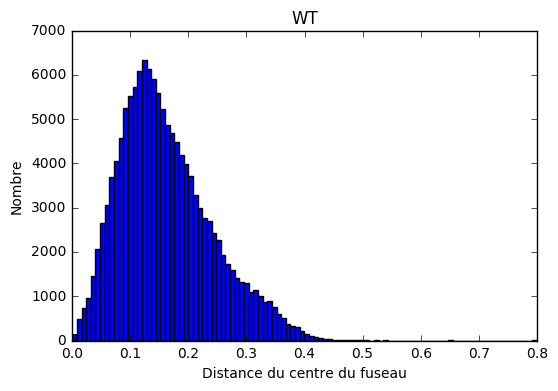

In [13]:
plt.hist(list_distance, bins=100)  
plt.title("WT")
plt.xlabel("Distance du centre du fuseau")
plt.ylabel("Nombre")
plt.show()

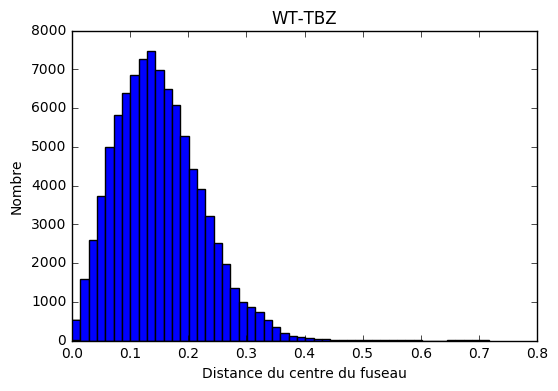

In [61]:
plt.hist(list_distance, bins=50)  
plt.title("WT-TBZ")
plt.xlabel("Distance du centre du fuseau")
plt.ylabel("Nombre")
plt.show()

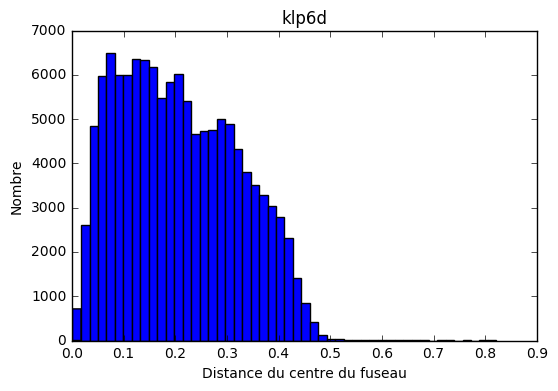

In [63]:
plt.hist(list_distance, bins=50)  
plt.title("klp6d")
plt.xlabel("Distance du centre du fuseau")
plt.ylabel("Nombre")
plt.show()

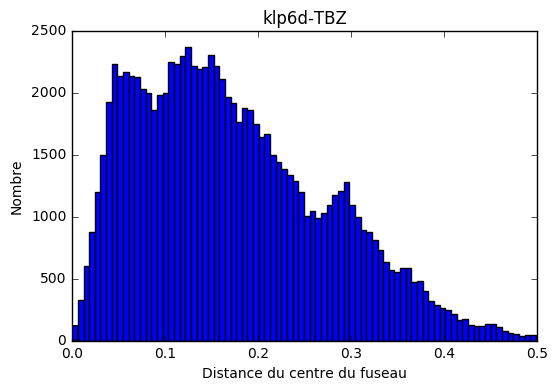

In [72]:
plt.hist(list_distance, bins=125)  
plt.title("klp6d-TBZ")
plt.xlabel("Distance du centre du fuseau")
plt.ylabel("Nombre")
plt.xlim(0,0.5)

plt.show()

In [73]:
max(list_distance)

0.76020298123334051